# 분류 모델
### 모델 선택 + 하이퍼 파라미터(학습 횟수 등) 세팅 - 중요
#### 전처리된 dataset을 GPT에 준다음 data에 맞는 모델 추천 받고 
#### 하이퍼 파라미터(https://optuna.org)까지 추천 받아서 평가하는 것도 방법

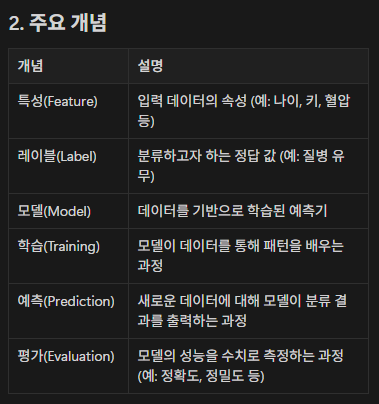

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200) # max_iter : 최대 학습 횟수
model.fit(X_train, y_train) # 최적의 파라미터 값을 찾아서 모델이 학습

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

# random_state 분류에 따라서 달라짐 - cross_val_score 활용하여 평균값 활용
# support 값 : 특정 y 값이 불균형하게 분포한 경우 weighted avg 값이 더 정확
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# 다양한 함수를 파라미터로 쓰는 함수

def train_evaluation_model(model): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    
    return model

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # 앙상블 모델 - 여러 모델을 한번에 자원소모 높음/ 과적합(오버피팅) 가능성 있음

print('DecisionTreeClassifier')
train_evaluation_model(DecisionTreeClassifier(random_state=7))

print('RandomForestClassifier')
train_evaluation_model(RandomForestClassifier(n_estimators=100, random_state=7)) # n_estimators : 다양하게 넣어보고 결과값으로 판단

DecisionTreeClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

RandomForestClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
